Graphing tools

In [2]:
from top2vec import Top2Vec
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from specify_texts import textfileNames, timeperiodStart, timeperiodEnd, metadata

c:\Users\gtzin\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Number of documents after filter: 7048


In [3]:
timeperiodStart, timeperiodEnd

(1640, 1660)

In [4]:
modelname = "1640_1660_top2vectrained_learn_unlemmatized"
model = Top2Vec.load(str("models/") + modelname)


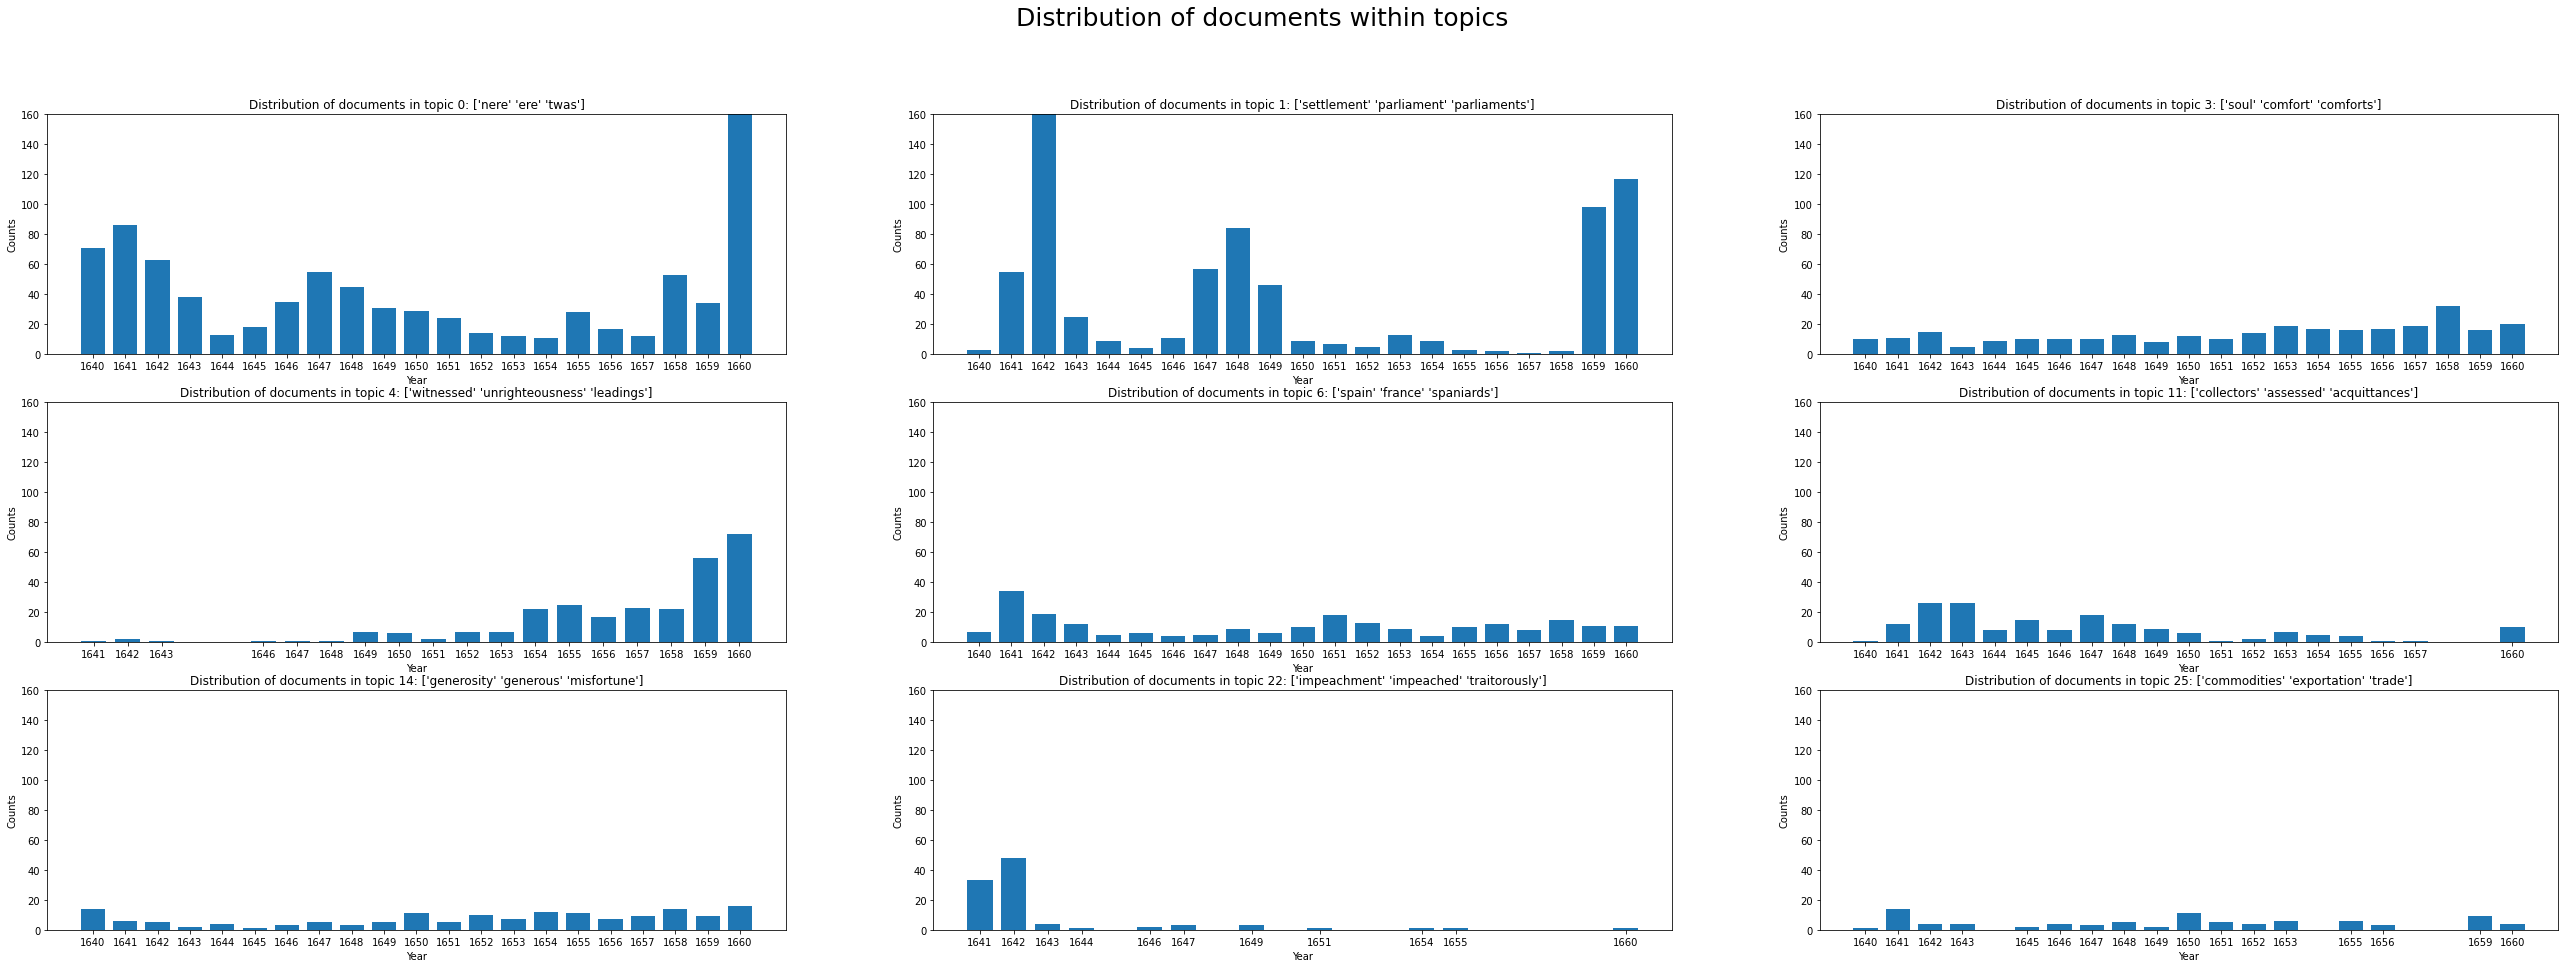

In [20]:
import math

topicNumbers = [0,1,3,4, 6,11,14,22,25]
numTopics = len(topicNumbers) #ideally squared numbers here!
topicWords = list()

topics = model.get_topics(model.get_num_topics())
for topicNum in topicNumbers:
    topicWords.append(topics[0][topicNum][0:3])

countsFrames = list()
for i in range(0, len(topicNumbers)):
    numDocuments = model.get_topic_sizes()[0][topicNumbers[i]]
    documentIDs = model.search_documents_by_topic(topicNumbers[i], numDocuments)[2]
    filteredDocumentsMetadata = metadata.iloc[documentIDs]
    counts = filteredDocumentsMetadata.groupby(['Date'])['Date'].count().reset_index(name = "Count")
    countsFrames.append(counts)

size = int(math.sqrt(numTopics))
fig, ax = plt.subplots(size, size, figsize=(size*15, size*5))
fig.suptitle(f"Distribution of documents within topics", fontsize=25)

for i in range(0, size):
    for j in range(0, size):
        # df = countsFrames[i+j]
        df = countsFrames[0]
        ax[i][j].set_title(f"Distribution of documents in topic {topicNumbers[0]}: {topicWords[0]}")
        currentAx = ax[i][j]
        currentAx.bar(x = df.Date, height = df.Count, tick_label = df.Date, width = 0.75) 
        currentAx.set_xlabel("Year")
        currentAx.set_ylabel("Counts")
        currentAx.set_ylim(0, 160)
        countsFrames.pop(0)
        topicNumbers.pop(0)
        topicWords.pop(0)
    
plt.savefig("output_plots/TopicDistributions")
        



,Date,Count
0,1640,4
1,1641,13
2,1642,34
3,1643,43
4,1644,15
